# Import Necessary Libraries

In [ ]:
!pip install pandas scikit-learn xgboost


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import os

# Improting visualasition libraries for model comparision
import seaborn as sns
import matplotlib.pyplot as plt

# Extract and transform the data

In [ ]:
# Load the data
csv_file = "Final Dataset Attrition.csv"
csv_path = f'Data/{csv_file}'

In [ ]:
df = pd.read_csv(csv_path)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [ ]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


In [ ]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

In [ ]:
#dropping columns that may cause issues in ML deployment
columns_to_drop = ["Date_of_termination","Unnamed: 32"]

In [ ]:
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Handle categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))


In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,1,2,1,2,1,2,1,2,3,...,0,1,729,2,0,4,2,0,0,0
1,21,0,2,1,15,1,3,1,6,4,...,0,1,439,3,1,5,2,0,2,2
2,45,0,2,1,6,1,3,3,5,1,...,0,3,796,1,1,1,3,0,0,0
3,23,0,2,2,2,1,3,1,8,1,...,0,2,905,3,0,1,0,1,2,1
4,22,0,2,1,15,0,3,1,2,4,...,0,2,497,0,1,5,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,2,2,3,1,2,4,3,1,...,16,3,180,2,0,3,2,0,1,2
1466,55,0,2,1,1,1,3,5,3,1,...,13,3,684,3,1,1,1,0,3,1
1467,55,0,2,2,26,1,2,5,3,4,...,13,3,577,3,0,2,1,0,2,2
1468,58,0,2,2,10,1,3,4,7,3,...,8,2,1054,4,1,2,2,1,0,2


# Pre-process data to train

In [ ]:
# Define features and target variable
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model (you can use other models as well)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy_rf: {accuracy_rf:.2f}")

Accuracy_rf: 0.86


In [ ]:
print("Classification Report RF:\n", classification_report(y_test, y_pred))

Classification Report RF:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.89      0.17      0.29        47

    accuracy                           0.86       294
   macro avg       0.88      0.58      0.61       294
weighted avg       0.87      0.86      0.82       294



# Comparing different models

In [ ]:
#Creating other models
logistic_regression = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
xgboost_model = XGBClassifier(random_state=42)

In [ ]:
# Train models
logistic_regression.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [ ]:
# Display results
print("Accuracy - RandomForest: {:.2f}".format(accuracy_rf))
print("Accuracy - Logistic Regression: {:.2f}".format(accuracy_lr))
print("Accuracy - SVM: {:.2f}".format(accuracy_svm))
print("Accuracy - XGBoost: {:.2f}".format(accuracy_xgb))

Accuracy - RandomForest: 0.86
Accuracy - Logistic Regression: 0.84
Accuracy - SVM: 0.84
Accuracy - XGBoost: 0.86


# Visaual Comparision

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

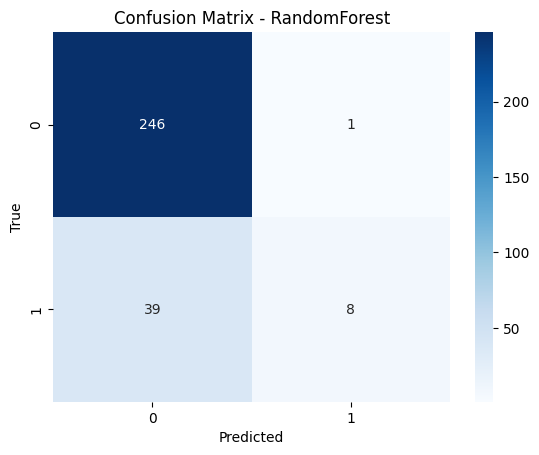

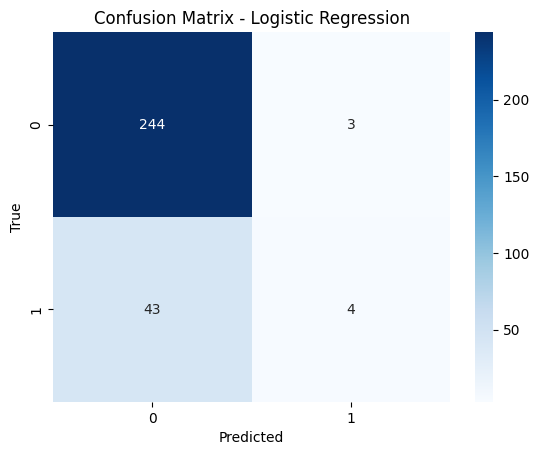

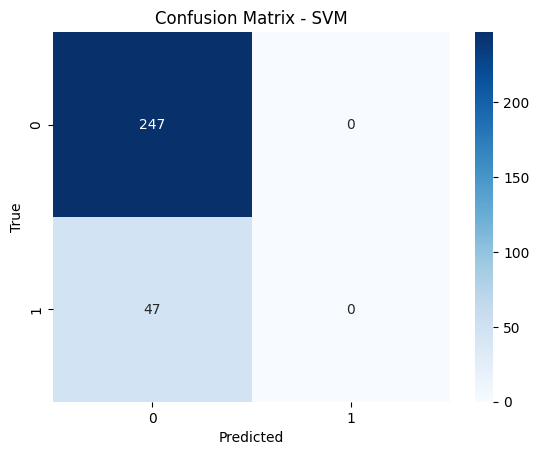

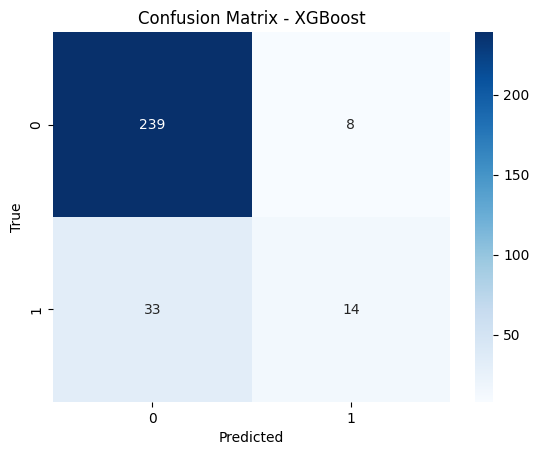

In [ ]:
# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred, "RandomForest")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

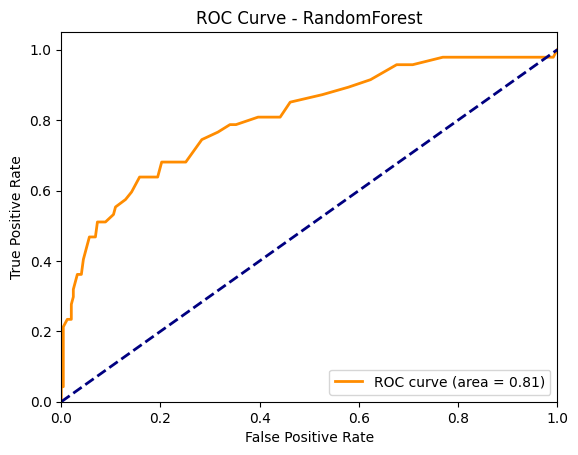

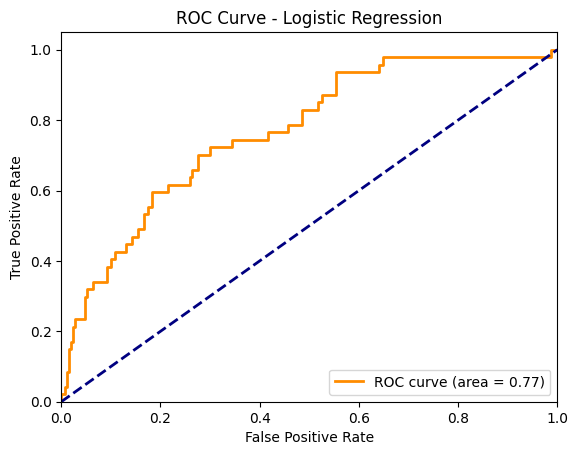

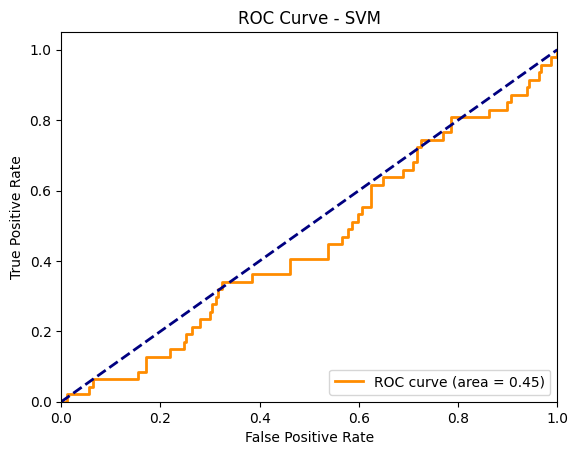

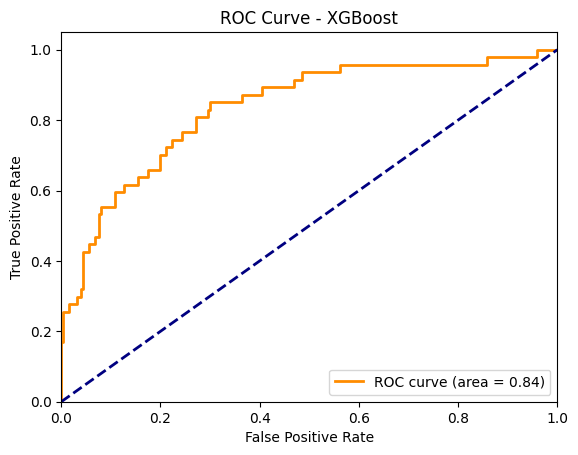

In [ ]:
# Function to plot ROC curve for any model

def plot_roc_curve(y_true, y_pred_proba_or_decision, model_name):
    if hasattr(y_pred_proba_or_decision, 'predict_proba'):
        # If the model has predict_proba method
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba_or_decision.predict_proba(X_test)[:, 1])
    elif hasattr(y_pred_proba_or_decision, 'decision_function'):
        # If the model has decision_function method
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba_or_decision.decision_function(X_test))
    else:
        raise AttributeError("Model does not have predict_proba or decision_function methods")

    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_roc_curve(y_test, rf_model, "RandomForest")
plot_roc_curve(y_test, logistic_regression, "Logistic Regression")
plot_roc_curve(y_test, svm_model, "SVM")
plot_roc_curve(y_test, xgboost_model, "XGBoost")

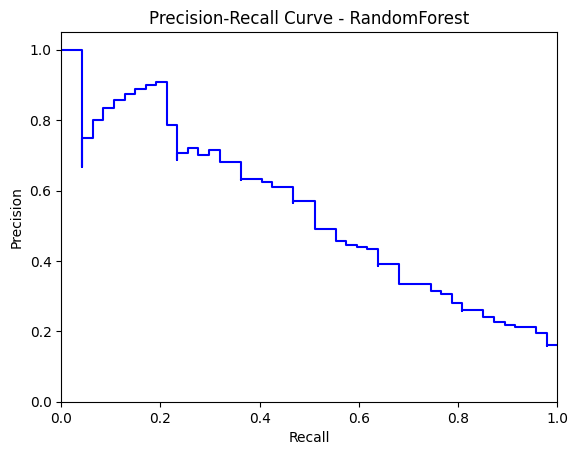

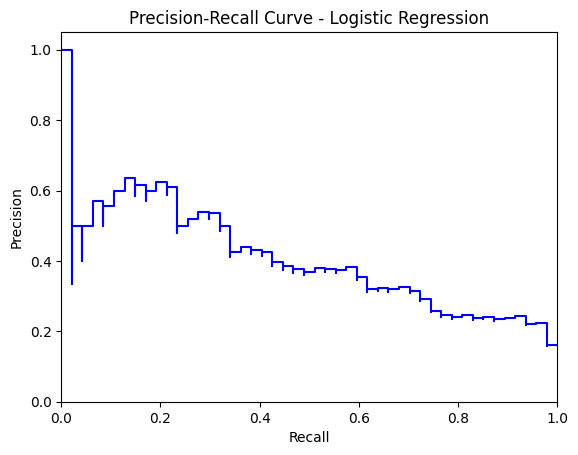

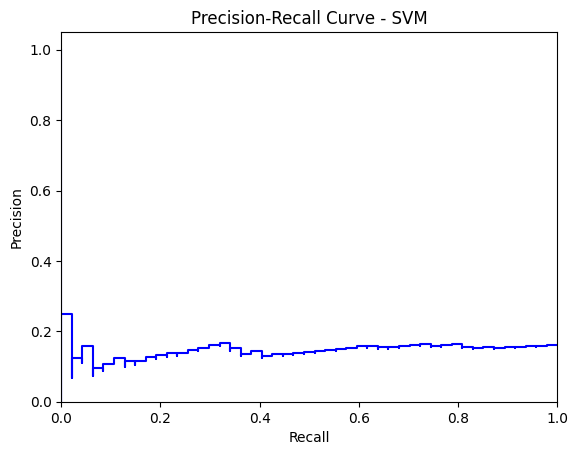

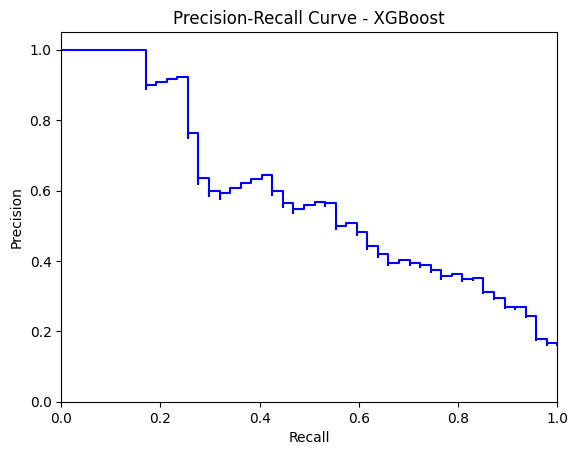

In [ ]:
from sklearn.metrics import precision_recall_curve

# Function to plot precision-recall curve for any model
def plot_precision_recall_curve_general(y_true, y_pred_proba_or_decision, model_name):
    if hasattr(y_pred_proba_or_decision, 'predict_proba'):
        # If the model has predict_proba method
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba_or_decision.predict_proba(X_test)[:, 1])
    elif hasattr(y_pred_proba_or_decision, 'decision_function'):
        # If the model has decision_function method
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba_or_decision.decision_function(X_test))
    else:
        raise AttributeError("Model does not have predict_proba or decision_function methods")

    plt.figure()
    plt.step(recall, precision, color='b', where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

# Plot precision-recall curves for each model
plot_precision_recall_curve_general(y_test, rf_model, "RandomForest")
plot_precision_recall_curve_general(y_test, logistic_regression, "Logistic Regression")
plot_precision_recall_curve_general(y_test, svm_model, "SVM")
plot_precision_recall_curve_general(y_test, xgboost_model, "XGBoost")

# Building data pipeline with the best model

In [ ]:
# Create a Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Include scaling if needed
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.86
Confusion Matrix:
[[246   1]
 [ 39   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.89      0.17      0.29        47

    accuracy                           0.86       294
   macro avg       0.88      0.58      0.61       294
weighted avg       0.87      0.86      0.82       294

